<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer: where the data enters the model (in the form of Numpy arrays). Visible.
### Hidden Layer: one of potentially many inner layers that are not visible. They receive inputs from the previous layer, perform a manipulation, and pass onto the next layer. 
### Output Layer: the final layer that outputs a vector of values (hopefully) suitable for our problem. Usually modified by an activation function. 
### Neuron: the thing that accepts inputs and returns outputs by multiplying the inputs by a weight, adding a bias, and "firing" if there's enough signal from the activation function. 1 neuron per tensor per layer.
### Weight: Where the knowledge of the network lies. Weights are values in tensors that get multiplied by the input. They get updated in each epoch to try and minimize the loss function. 
### Activation Function: A chosen mathematical function that decides whether to "fire" the neuron -- it fires if the output value crosses a certain threshold. Each node has one, and typically all nodes in a layer have the same one.
### Node Map: A visual representation of the layout of a neural network. Layers of circles (nodes) with lines drawn between them.
### Perceptron: Basically a neuron. Takes inputs, returns output.


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

#### Information enters as input (tensor). As it enters a given layer, it is multiplied by the "weights" and then summed along with a "bias", before being passed through the "activation function" that decides whether to send the information off into the next layer. That process repeats for each layer, representing the information in a new way each time, terminating in the output layer, which is the form we want the informaiton to be in (predicting the target).

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [1]:
import pandas as pd
import numpy as np

data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')

In [2]:
inputs = df.to_numpy()

correct_outputs = [[1], [1], [1], [0]]

inputs

array([[0, 0, 1],
       [1, 0, 1],
       [0, 1, 1],
       [1, 1, 0]])

In [3]:
# sigmoid function and its derivative for updating weights

def sigmoid(x):
  return 1 / (1+np.exp(-x))

def sigmoid_derivative(x):
  sx = sigmoid(x)
  return sx * (1-sx)

In [5]:
# Initialize random weights for our inputs

weights = 2 * np.random.random((3,1)) - 1

weights

array([[ 0.00717346],
       [ 0.50477422],
       [-0.16848278]])

In [6]:
# We've already: 
### Randomly Initialized Weights. Those are in memory as `weights`
### Gotten input data & correct outputs


# Update our weights 10,000 times - (fingers crossed that this process reduces error)

for iteration in range(10000):
    
    # Weighted sum of inputs / weights
    weighted_sum = np.dot(inputs, weights)
    
    # Activate!
    activated_output = sigmoid(weighted_sum)
    
    # Cac error
    error = correct_outputs - activated_output
    
    adjustments = error * sigmoid_derivative(weighted_sum)
    
    # Update the Weights
    weights += np.dot(inputs.T, adjustments)
    
print("Weights after training")
print(weights)

print("Output after training")
print(activated_output)

Weights after training
[[-2.41111111]
 [-2.40931537]
 [ 7.49017705]]
Output after training
[[0.99944173]
 [0.99381249]
 [0.99382352]
 [0.00799925]]


In [ ]:
# Hooray, we wanted [1,1,1,0] with >99% accuracy

## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [8]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [14]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, Normalizer


feats = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'bias']
target = 'Outcome'
# feats = list(diabetes)[:-1]

# introducing bias into familiar machine learning workflows as part of the neural network
diabetes['bias'] = np.ones(diabetes.shape[0])

# put features and target into numpy arrays
X = diabetes[feats].to_numpy()
y = diabetes[target].to_numpy()
y = y * 2 - 1

In [15]:
# use MinMaxScaler to scale data

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
# the perceptron

class Perceptron:
    
    def __init__(self, rate = 0.1, niter = 10):
        self.rate = rate
        self.niter = niter
    
    def __sigmoid(self, x):
        return 1 / (1 + np.exp(-X))
    
    def __sigmoid_derivative(self, x):
        sx = self.__sigmoid(X)
        return sx * (1-sx)

    def fit(self, X, y):
        """Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """

        # Randomly Initialize Weights
        self.weight = np.zeros(1 + X.shape[1])

        # Number of misclassifications
        self.errors = []
        
        for i in range(self.niter):
            err = 0
            for xi, target in zip(X, y):
                delta_w = self.rate * (target - self.predict(xi))
                # Weighted sum of inputs / weights
                self.weight[1:] += delta_w * xi
                self.weight[0] += delta_w
                err += int(delta_w != 0.0)
            self.errors.append(err)
        return self
    
    def weighted_sum(self, X):
        """Calculate weighted sum of neuron"""
        """The dot product of an input times the weights, plus a bias"""
        return np.dot(X, self.weight[1:]) + self.weight[0]


    def predict(self, X):
        """Returns 0 or 1 based on whether the prediction is above or below 0.5"""
        return np.where(self.weighted_sum(X) >= 0.0, 1, -1)

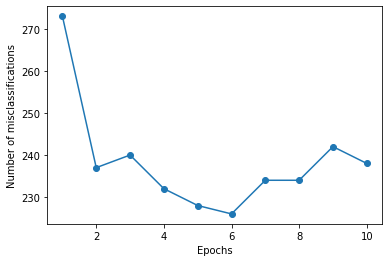

In [17]:
# Overfitting after 6 epochs? 

import matplotlib.pyplot as plt

#initialize perceptron
nn = Perceptron()

#fit on diabetes data
nn.fit(X_scaled,y)
plt.plot(range(1, len(nn.errors) + 1), nn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()


In [18]:
diabetes.shape

(768, 10)

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?